# Download the COE dataset

Dataset copied from [data.gov.sg](https://data.gov.sg/datasets/d_69b3380ad7e51aff3a7dcc84eba52b8a/view)

In [1]:
!curl -sLO https://github.com/joetanx/study/raw/refs/heads/main/coe-example/COEBiddingResults.csv

# Review the dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
df = pd.read_csv('COEBiddingResults.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1740 entries, 0 to 1739
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   month          1740 non-null   object
 1   bidding_no     1740 non-null   int64 
 2   vehicle_class  1740 non-null   object
 3   quota          1740 non-null   int64 
 4   bids_success   1740 non-null   object
 5   bids_received  1740 non-null   object
 6   premium        1740 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 95.3+ KB


# Processing the date
- COE biddings happen twice a month (typically first and third Wednesdays).
- Hence, the COE dataset contains `month` and `bidding_no` columns
- To facilitate data visualization, let's assign first bidding to 1st and second bidding to 15th of the month
- Let's add a new `date` column, and drop the original `month` and `bidding_no` columns

In [3]:
df['date'] = df.apply(lambda row: f"{row['month']}-{('01' if row['bidding_no'] == 1 else '15')}", axis=1)
df['date'] = pd.to_datetime(df['date'])
df = df.drop(columns=['month', 'bidding_no'])
df = df[['date'] + [col for col in df.columns if col != 'date']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1740 entries, 0 to 1739
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1740 non-null   datetime64[ns]
 1   vehicle_class  1740 non-null   object        
 2   quota          1740 non-null   int64         
 3   bids_success   1740 non-null   object        
 4   bids_received  1740 non-null   object        
 5   premium        1740 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 81.7+ KB


# Trying to plot `quota` and `bids_received`

Let's limit the `vehicle_class` to `Category B` and range in 2023 for simple visualization

In [4]:
df_b = df[df['vehicle_class'] == 'Category B']
df_b = df_b[(df_b['date'] >= '2023-01-01') & (df_b['date'] <= '2023-12-31')]

Plotting the chart give unexpected results

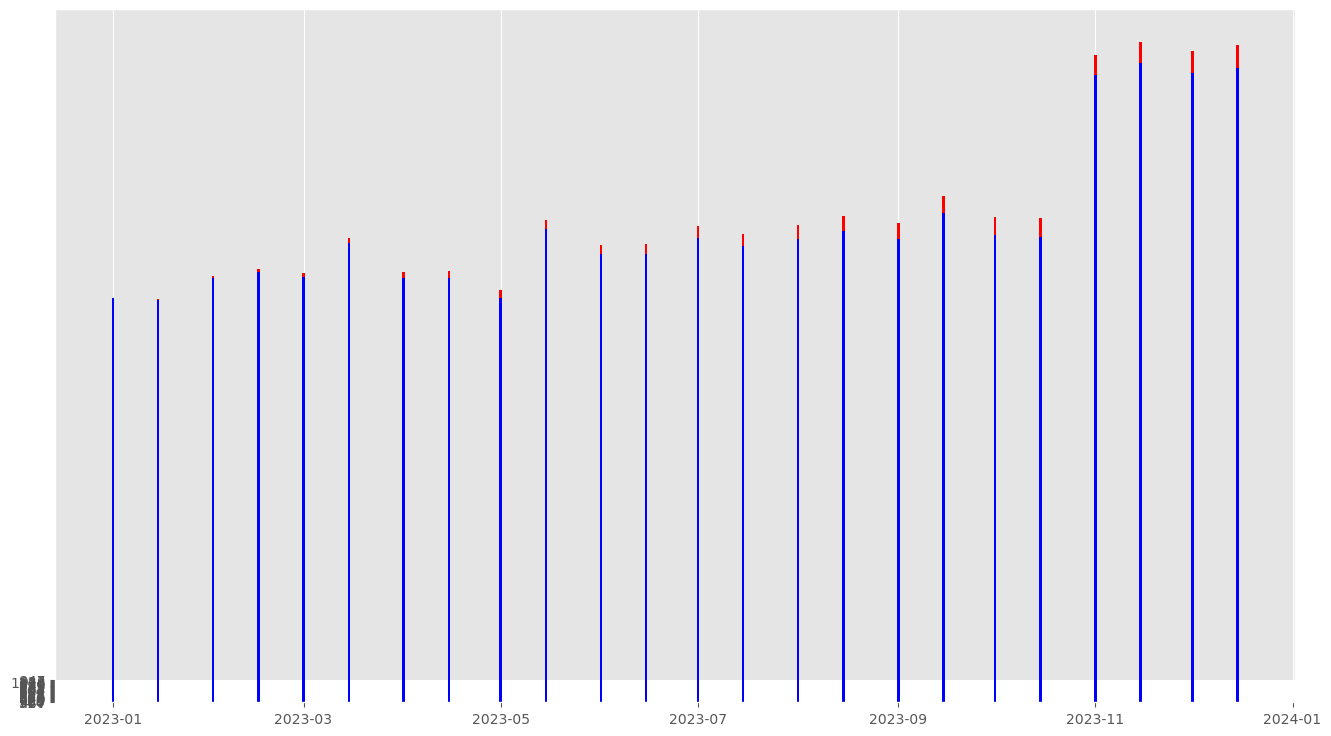

In [5]:
plt.figure(figsize=(16, 9))
plt.bar(df_b['date'], df_b['quota'], label='Quota', color='b')
plt.bar(df_b['date'], df_b['bids_received'], bottom=df_b['quota'], label='Bids Received', color='r')
plt.show()

Looking at the datatypes, turns out that `bids_received` and `bids_success` are `object` instead of `int64`

In [6]:
df.dtypes

date             datetime64[ns]
vehicle_class            object
quota                     int64
bids_success             object
bids_received            object
premium                   int64
dtype: object

Attempting to use `to_numeric` throws errors, turns out that the column values contains commas `,`

In [7]:
df['bids_received'] = pd.to_numeric(df['bids_received'])

ValueError: Unable to parse string "1,438" at position 1578

In [8]:
df['bids_success'] = pd.to_numeric(df['bids_success'])

ValueError: Unable to parse string "1,007" at position 1720

Scrub the commas away and the type conversion is successful

In [9]:
df['bids_received'] = df['bids_received'].str.replace(',', '', regex=False)
df['bids_received'] = pd.to_numeric(df['bids_received'])
df['bids_success'] = df['bids_success'].str.replace(',', '', regex=False)
df['bids_success'] = pd.to_numeric(df['bids_success'])
df.dtypes

date             datetime64[ns]
vehicle_class            object
quota                     int64
bids_success              int64
bids_received             int64
premium                   int64
dtype: object

# Let's plot `quota` and `bids_received` again

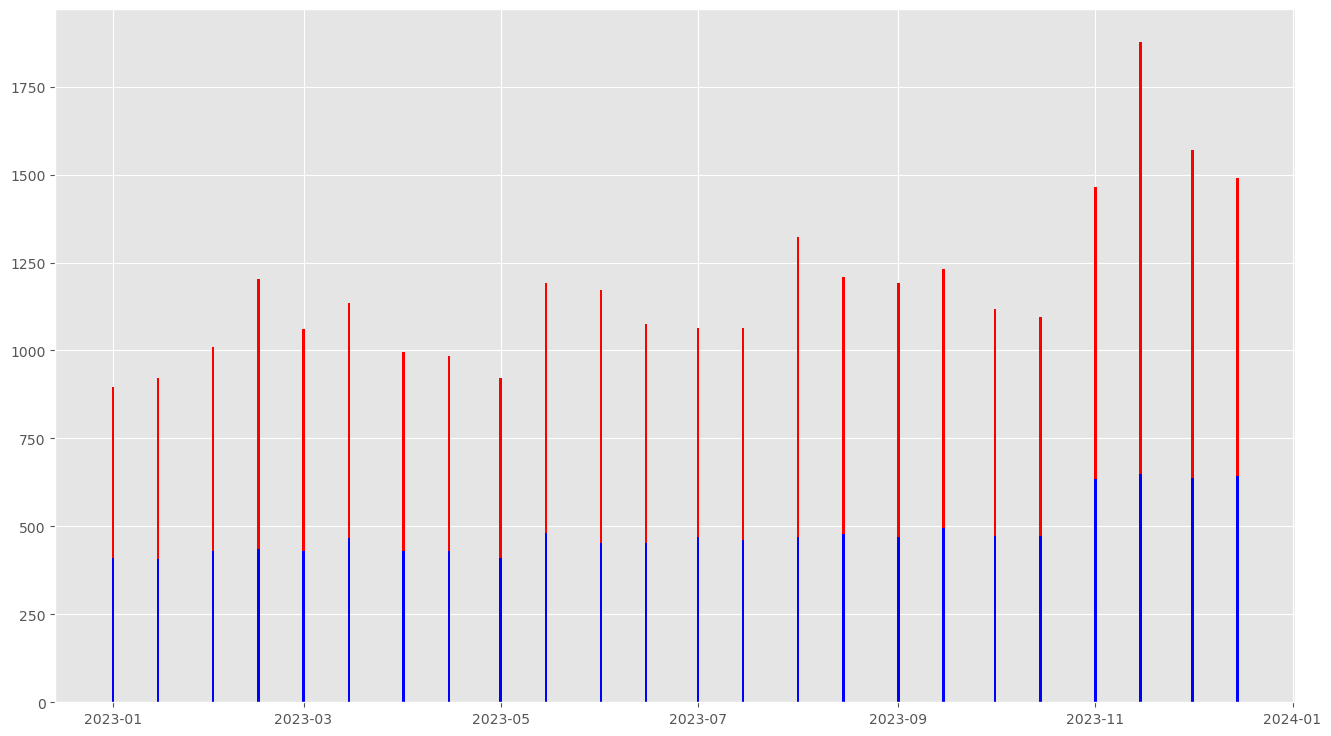

In [10]:
df_b = df[df['vehicle_class'] == 'Category B']
df_b = df_b[(df_b['date'] >= '2023-01-01') & (df_b['date'] <= '2023-12-31')]
plt.figure(figsize=(16, 9))
plt.bar(df_b['date'], df_b['quota'], label='Quota', color='b')
plt.bar(df_b['date'], df_b['bids_received'], bottom=df_b['quota'], label='Bids Received', color='r')
plt.show()